In [132]:
import pandas as pd
import numpy as np
import math

df = pd.read_csv('segmentationData.csv')
df.describe()

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,FiberAlign2Ch3,IntenCoocMaxCh3,IntenCoocMaxCh4,NeighborMinDistCh1,SkewIntenCh4
count,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,90.493405,320.336305,126.071679,189.052115,96.420171,140.701585,1.205859,0.895764,72.660125,1.454076,0.231957,0.246709,29.691933,0.932515
std,48.760000,214.023533,165.008379,158.956105,96.666924,146.634665,0.202522,0.076108,49.028338,0.252347,0.204030,0.183398,11.501550,0.885901
min,0.030876,150.000000,15.160400,1.000000,0.120000,0.563265,1.005831,0.510623,25.760355,1.000000,0.014286,0.013423,10.083350,-1.004442
25%,53.892205,193.000000,35.364158,44.998570,33.495693,40.679740,1.065236,0.856972,43.532759,1.290022,0.051171,0.107596,22.547068,0.403460
50%,90.588770,253.000000,62.343173,173.506300,67.431250,90.250000,1.148620,0.913262,55.810304,1.469231,0.179775,0.211886,27.642860,0.728311
75%,126.682013,362.500000,143.187800,279.289704,127.341651,191.170410,1.280514,0.955606,79.909902,1.647809,0.353311,0.337116,34.079173,1.225431
max,179.939323,2186.000000,1418.634831,989.509800,1205.512000,886.837500,2.900320,0.996499,442.773196,2.000000,0.968326,0.940367,126.993700,8.069013


# Implementation Part 2 (50%): Cell Body Segmentation Data

## 1. Give an overview of the dataset structure by answering those questions:

### How many samples and features are in the dataset?

In [133]:
print('Samples:', len(df))
print('Features:',len(df.columns))

Samples: 2019
Features: 15


### What are the feature data types?

In [134]:
df.dtypes

Class                       object
AngleCh1                   float64
AreaCh1                      int64
AvgIntenCh1                float64
AvgIntenCh2                float64
AvgIntenCh3                float64
AvgIntenCh4                float64
ConvexHullAreaRatioCh1     float64
ConvexHullPerimRatioCh1    float64
DiffIntenDensityCh1        float64
FiberAlign2Ch3             float64
IntenCoocMaxCh3            float64
IntenCoocMaxCh4            float64
NeighborMinDistCh1         float64
SkewIntenCh4               float64
dtype: object

### Are diamonds balanced across color, cut and clarity? (Hint: roughly 1:1 means balanced, e.g. 1:2 is a “1:2 imbalance”)

In [135]:
color_df = df.groupby('Class').size().to_frame('count')
color_df['balance'] = color_df['count'] / color_df['count'].min()
color_df = color_df.sort_values('balance')
print(color_df)

       count   balance
Class                 
WS       719  1.000000
PS      1300  1.808067


the two classes WS an PS are not really balanced (imbalanced) with a ration of 1 : 1.8


## 2. Visualize diamond prices using a histogram, boxplot and density plot.

array([[<AxesSubplot:title={'center':'AngleCh1'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'AreaCh1'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'AvgIntenCh1'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'AvgIntenCh2'}, xlabel='Class'>],
       [<AxesSubplot:title={'center':'AvgIntenCh3'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'AvgIntenCh4'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'ConvexHullAreaRatioCh1'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'ConvexHullPerimRatioCh1'}, xlabel='Class'>],
       [<AxesSubplot:title={'center':'DiffIntenDensityCh1'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'FiberAlign2Ch3'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'IntenCoocMaxCh3'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'IntenCoocMaxCh4'}, xlabel='Class'>],
       [<AxesSubplot:title={'center':'NeighborMinDistCh1'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'SkewInt

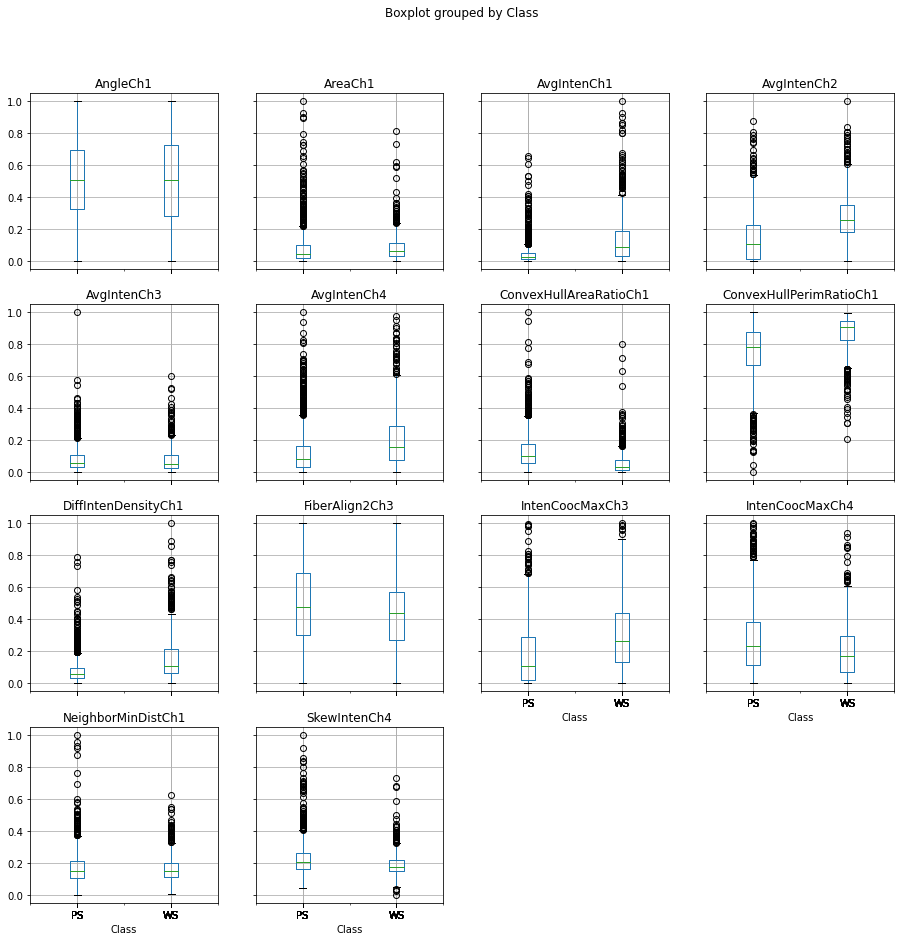

In [136]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
normalized_df = df.copy()
normalized_df[["AngleCh1", "AreaCh1", "AvgIntenCh1", "AvgIntenCh2", "AvgIntenCh3", "AvgIntenCh4", "ConvexHullAreaRatioCh1", "ConvexHullPerimRatioCh1", "DiffIntenDensityCh1", "FiberAlign2Ch3", "IntenCoocMaxCh3", "IntenCoocMaxCh4", "NeighborMinDistCh1", "SkewIntenCh4"]] = min_max_scaler.fit_transform(df[["AngleCh1", "AreaCh1", "AvgIntenCh1", "AvgIntenCh2", "AvgIntenCh3", "AvgIntenCh4", "ConvexHullAreaRatioCh1", "ConvexHullPerimRatioCh1", "DiffIntenDensityCh1", "FiberAlign2Ch3", "IntenCoocMaxCh3", "IntenCoocMaxCh4", "NeighborMinDistCh1", "SkewIntenCh4"]])

normalized_df.boxplot(by="Class", column=["AngleCh1", "AreaCh1", "AvgIntenCh1", "AvgIntenCh2", "AvgIntenCh3", "AvgIntenCh4", "ConvexHullAreaRatioCh1", "ConvexHullPerimRatioCh1", "DiffIntenDensityCh1", "FiberAlign2Ch3", "IntenCoocMaxCh3", "IntenCoocMaxCh4", "NeighborMinDistCh1", "SkewIntenCh4"], figsize=(15,15))

array([[<AxesSubplot:title={'center':'ConvexHullAreaRatioCh1'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'ConvexHullPerimRatioCh1'}, xlabel='Class'>],
       [<AxesSubplot:title={'center':'FiberAlign2Ch3'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'IntenCoocMaxCh3'}, xlabel='Class'>],
       [<AxesSubplot:title={'center':'IntenCoocMaxCh4'}, xlabel='Class'>,
        <AxesSubplot:title={'center':'SkewIntenCh4'}, xlabel='Class'>]],
      dtype=object)

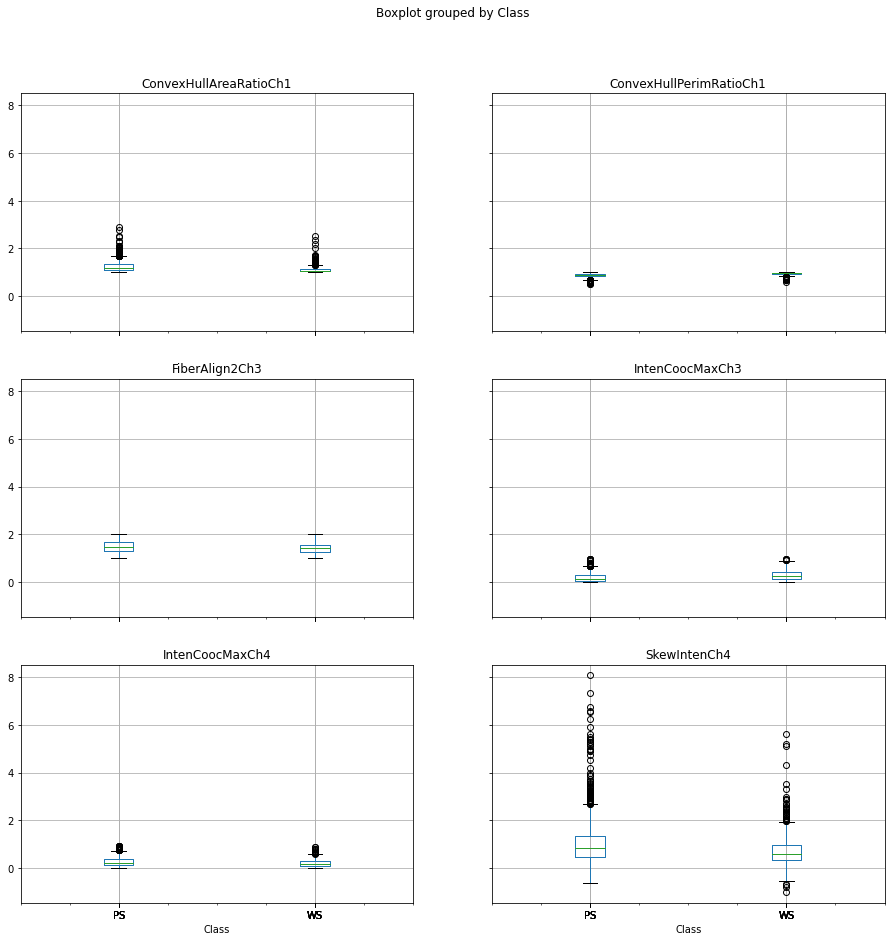

In [137]:
df.boxplot(by="Class", column=["ConvexHullAreaRatioCh1", "ConvexHullPerimRatioCh1", "FiberAlign2Ch3", "IntenCoocMaxCh3", "IntenCoocMaxCh4", "SkewIntenCh4"], figsize=(15,15))

In [138]:
df.groupby("Class").mean()

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,FiberAlign2Ch3,IntenCoocMaxCh3,IntenCoocMaxCh4,NeighborMinDistCh1,SkewIntenCh4
Class,,,,,,,,,,,,,,
PS,90.619486,314.339231,78.342220,138.852531,96.309678,114.191873,1.255922,0.875728,60.748834,1.470619,0.189937,0.269191,30.063084,1.054383
WS,90.265441,331.179416,212.369728,279.816315,96.619950,188.632915,1.115343,0.931988,94.196536,1.424166,0.307932,0.206060,29.020866,0.712169


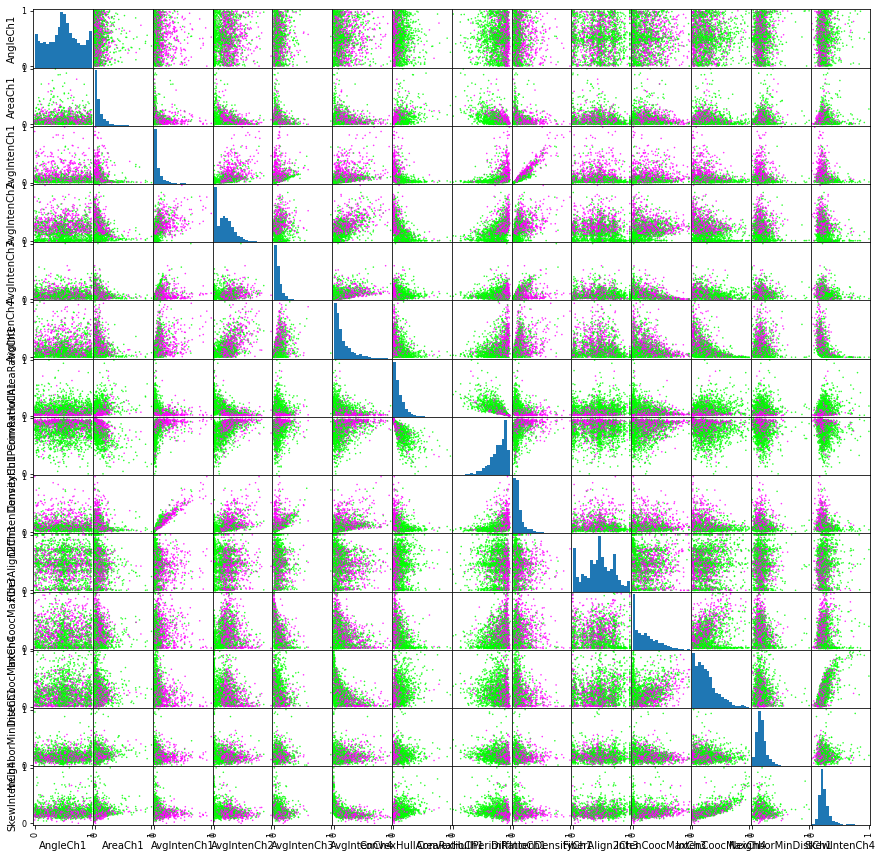

In [139]:
colums = ["AngleCh1", "AreaCh1", "AvgIntenCh1", "AvgIntenCh2", "AvgIntenCh3", "AvgIntenCh4", "ConvexHullAreaRatioCh1", "ConvexHullPerimRatioCh1", "DiffIntenDensityCh1", "FiberAlign2Ch3", "IntenCoocMaxCh3", "IntenCoocMaxCh4", "NeighborMinDistCh1", "SkewIntenCh4"]

test = lambda x: '#0f0' if x == "PS" else "#f0f"
vfunc = np.vectorize(test)
grr = pd.plotting.scatter_matrix(
    normalized_df[colums], c=vfunc(df.Class), figsize=(15,15), marker='.',
    hist_kwds={'bins':20}, s=10, alpha=.8, cmap='brg')

In [140]:
print('Mean:', round(df['AreaCh1'].mean(), 2))
print('Median:', round(df['AreaCh1'].median(), 2))
print('STD: ', round(df['AreaCh1'].std(), 2))
# the mad() function is deprecated
print('MAD: ', round((df['AreaCh1'] - df['AreaCh1'].mean()).abs().mean(), 2))
print('Q1:', df['AreaCh1'].quantile(0.25))
print('Q3:', df['AreaCh1'].quantile(0.75))
print('Inner quartile: ', df['AreaCh1'].quantile(0.75) - df['AreaCh1'].quantile(0.25))

Mean: 320.34
Median: 253.0
STD:  214.02
MAD:  137.58
Q1: 193.0
Q3: 362.5
Inner quartile:  169.5


###  Answer this question: Is there trend visible in those plots? If yes, which is it and in which plots can you see it?

There exist much more cheap diamonds up to 2500 and the amount decreases exponential which is very good visible in the boxplot and histogram.
The boxplot also shows that there are many outliers beyond 12000. 75% of the diamonds are below 5000.

## 3. Calculate and state the mean, median, standard deviation, median absolute deviation (MAD), 1st and 3rd quartile (Q1 and Q3), and inner quartile range of the diamond price.
• If you are not familiar with those functions: use Google, Wikipedia,
etc.
• Required commands are all in the provided script.

In [141]:
print('Mean:', round(df['price'].mean(), 2))
print('Median:', round(df['price'].median(), 2))
print('STD: ', round(df['price'].std(), 2))
# the mad() function is deprecated
print('MAD: ', round((df['price'] - df['price'].mean()).abs().mean(), 2))
print('Q1:', df['price'].quantile(0.25))
print('Q3:', df['price'].quantile(0.75))
print('Inner quartile: ', df['price'].quantile(0.75) - df['price'].quantile(0.25))

KeyError: 'price'

## 4. Plot the diamond price against the carat values as a scatterplot. Answer this question:
Hint: plotting many samples will be slow. Changing the plot symbol to '.' will cause a speedup.

In [ ]:
df.plot.scatter(x='carat', y='price', marker='.')

### Is there a trend visible in the plot? If yes, which is it?

There is no direct connection between price and carat.
It depends on more than the carat feature when you look on the spread of the points.
Tendencial more carat leads to higher prices.

## 5. Analyze the correlation between diamond price and diamond x, y, and z dimensions.

### Create pairwise plots for these features.

In [ ]:
pairwise_plot = df[['price', 'x', 'y', 'z']]
pd.plotting.scatter_matrix(pairwise_plot, figsize=(15,15))
print(pairwise_plot.corr())


### Is there a trend visible between x, y, and z? If yes, which is it?

Yes the dimensions all have a very high linear correlation, there is nearly a straight line.

### Is there a trend visible between the dimensions and the price? If yes, which is it?
• Hint: if you don’t know what a linear relation is (Google it!):
– Linear correlation: feature A low –> feature B low, and feature
A high –> feature B high.
– (Inverse) linear correlation is also a linear correlation: feature
A low –> feature B high, and feature A high –> feature B low:
inverse linear correlation. Usually also just called linear correlation.
– When plotting feature A against feature B and their points form
a “straight line”, then it’s a linear relationship between A and B
= linear correlation.

The larger the dimensions the greater the price.
X spreads more than y or z.
There is also a large linear correlation between price and dimension, at least 86%.

## 6. Analyze diamond prices per diamond color.

### Create boxplots showing diamond price boxes for each diamond color (all boxes should be in one figure).

In [ ]:
df.boxplot('price', by='color')

### Create densityplots showing diamond prices for each diamond color (all densities should be in one figure).

In [ ]:
df.groupby('color')['price'].plot.density(legend=True)

### Answer this question: is there a trend visible? If yes, which one?

Most of the diamond colors are sold for approximately the same price.
Depending on the color there exist more or less diamonds.
Type E for example looks very stable and there are no peaks.

## 7. Use vectorized commands (= no loops!) to answer these questions:

### How many diamonds have a price above 9500?

In [ ]:
len(df[df['price'] > 9500])

### How many diamonds have a price above 9500 and have color “D”?

In [ ]:
len(df[(df['price'] > 9500) & (df['color'] == 'D')])

### What is the mean and std of the price of all color “D” diamonds with cut “Fair”?

In [ ]:
df[(df['cut'] == 'Fair') & (df['color'] == 'D')]['price'].mean()

In [ ]:
df[(df['cut'] == 'Fair') & (df['color'] == 'D')]['price'].std()

### What is the median and mad of the price of all color “J” diamonds with cut “Ideal”?

In [ ]:
dfIdeal = df[(df['cut'] == 'Ideal') & (df['color'] == 'J')]['price']
print('Median: ')
print(dfIdeal.median())
print('Ideal: ')
print((dfIdeal - dfIdeal.mean()).abs().mean())

### Create two copies of the dataframe that contains only the price and carat feature. Apply a log with base 10 to both features in one of those dataframes, and square (x' = x²) the features in the other dataframe. What is the mean and std of the transformed features in both dataframes?

In [ ]:
dfSquare = df[['carat', 'price']].applymap(func=lambda x: x ** 2)
print(dfSquare.mean())
print(dfSquare.std())

In [ ]:
dfLog = df[['carat', 'price']].applymap(func=math.log10)
print(dfLog.mean())
print(dfLog.std())